In [1]:
%ls data

전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 평균 분양가격(2019년 12월).csv


In [150]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MaxNLocator
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [31]:
df_last = pd.read_csv('./data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949', engine='python')
df_last.shape

(4335, 5)

In [9]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [10]:
df_first = pd.read_csv('./data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949', engine='python')
df_first.shape

(17, 22)

In [11]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [12]:
# 데이터 요약
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [13]:
# 결측치 확인
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [14]:
# 결측치의 개수 구하기
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [32]:
# 수치형 변수로 변경
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격
0,서울,전체,2015,10,5841,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN


In [33]:
df_last['평당분양가격'] = df_last['분양가격']*3.3
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


In [35]:
# 범주형 자료 요약
df_last['분양가격(㎡)'].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [36]:
# 연속형 자료 요약
df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [37]:
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [49]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '').str.strip()
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6,전체
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN,60㎡
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4,60㎡~85㎡
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN,85㎡~102㎡


In [51]:
df_last.drop(['규모구분','분양가격(㎡)'], axis=1, inplace=True)
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [59]:
# 지역별 분양가격의 평균
df_last.groupby(['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [60]:
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [62]:
df_last.groupby(['전용면적','지역명'])['평당분양가격'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [64]:
g = df_last.groupby(['연도','지역명'])['평당분양가격'].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [69]:
g.unstack().round().transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


In [81]:
pd.pivot_table(df_last, index='지역명', values='평당분양가격', aggfunc=['median', 'mean', 'max', 'min', 'sum'])

,median,mean,max,min,sum
,평당분양가격,평당분양가격,평당분양가격,평당분양가격,평당분양가격
지역명,,,,,
강원,7581.75,7890.750000,11873.4,6639.6,1909561.5
경기,13168.65,13356.895200,18711.0,10160.7,3339223.8
경남,9187.20,9268.778138,14199.9,7260.0,2289388.2
경북,8335.80,8376.536515,11408.1,6949.8,2018745.3
광주,9527.10,9951.535821,16107.3,7428.3,2000258.7
대구,11904.75,11980.895455,17021.4,8259.9,2899376.7
대전,9401.70,10253.333333,16094.1,8002.5,2030160.0
부산,12338.70,12087.121200,15255.9,9669.0,3021780.3


In [82]:
pd.pivot_table(df_last, index='전용면적', values='평당분양가격')

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [92]:
df_last.pivot_table(index='전용면적', columns='지역명', values='평당분양가격')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [95]:
df_last.pivot_table(index='지역명', columns='연도', values='평당분양가격').round()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


<AxesSubplot:xlabel='지역명'>

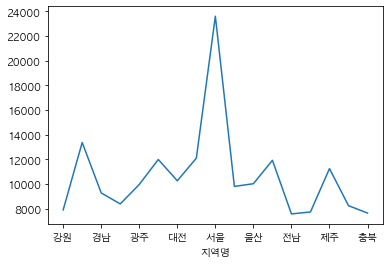

In [101]:
g = df_last.groupby(['지역명'])['평당분양가격'].mean()
g.plot()

<AxesSubplot:xlabel='지역명'>

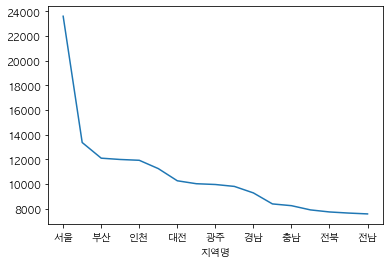

In [104]:
g = g.sort_values(ascending=False)
g.plot()

<AxesSubplot:xlabel='지역명'>

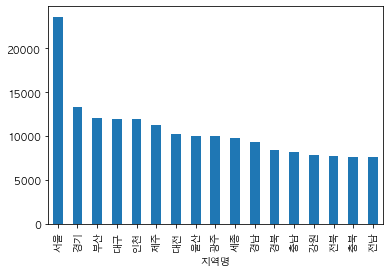

In [107]:
g.plot(kind='bar')

<AxesSubplot:xlabel='지역명'>

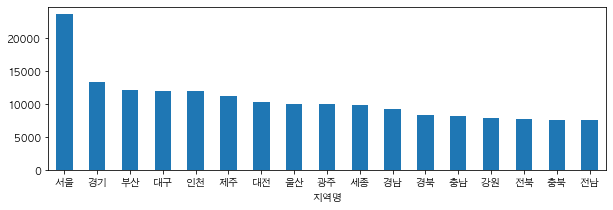

In [117]:
g.plot.bar(rot=0, figsize=(10,3))

<AxesSubplot:xlabel='전용면적'>

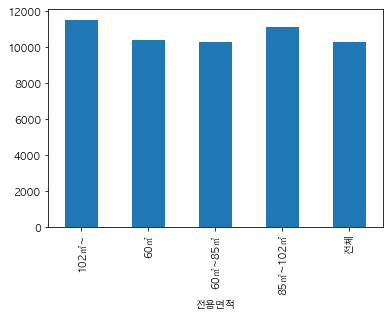

In [119]:
g = df_last.groupby(['전용면적'])['평당분양가격'].mean()
g.plot.bar()

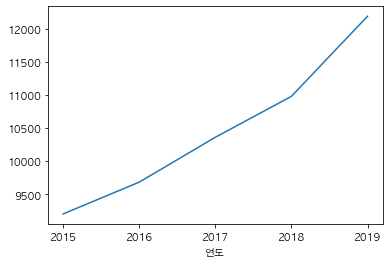

In [128]:
ax = plt.figure().gca()
df_last.groupby(['연도'])['평당분양가격'].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

<AxesSubplot:>

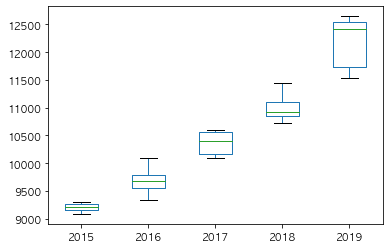

In [132]:
g = df_last.pivot_table(index='월', columns='연도', values='평당분양가격')
g.plot.box()

<AxesSubplot:>

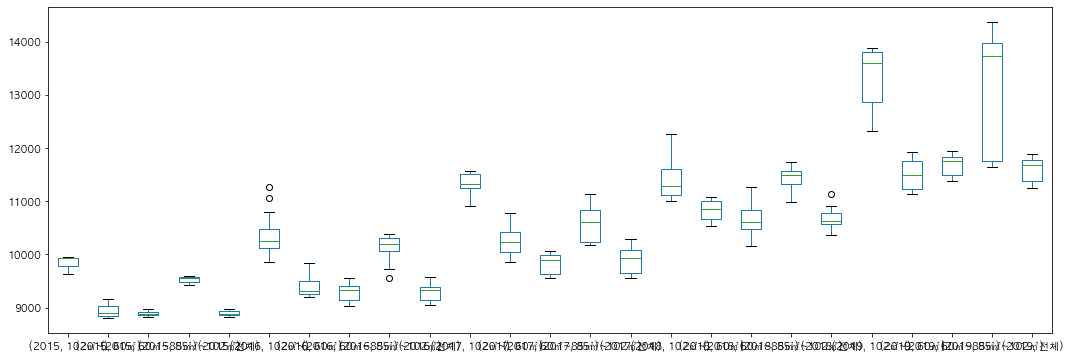

In [135]:
p = df_last.pivot_table(index='월', columns=['연도','전용면적'], values='평당분양가격')
p.plot.box(figsize=(18,6))

<AxesSubplot:xlabel='월'>

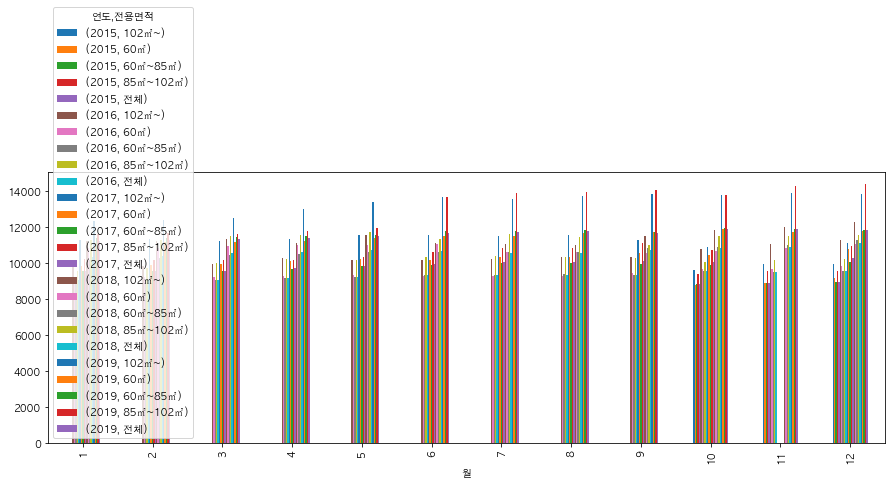

In [138]:
p.plot.bar(figsize=(15,5))

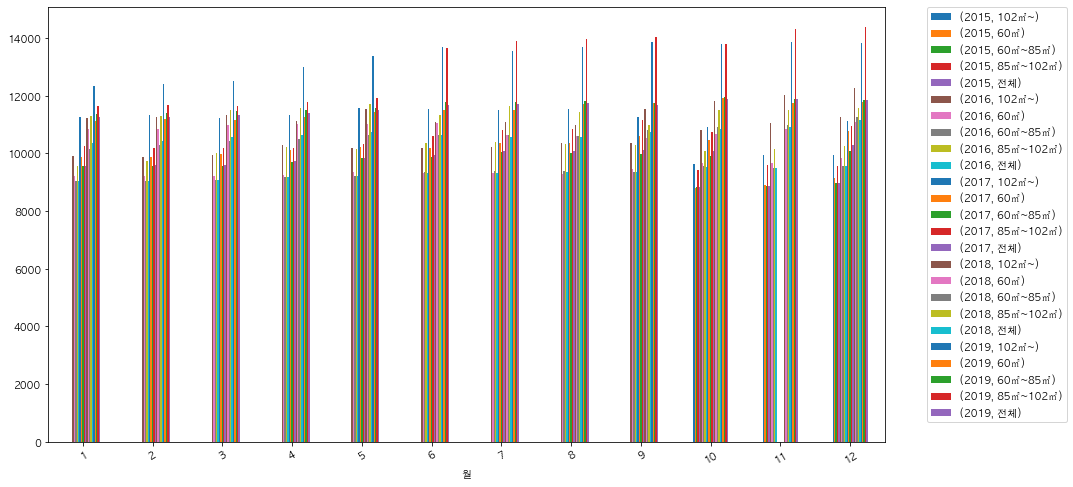

In [142]:
p.plot.bar(figsize=(15,8), rot=30)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

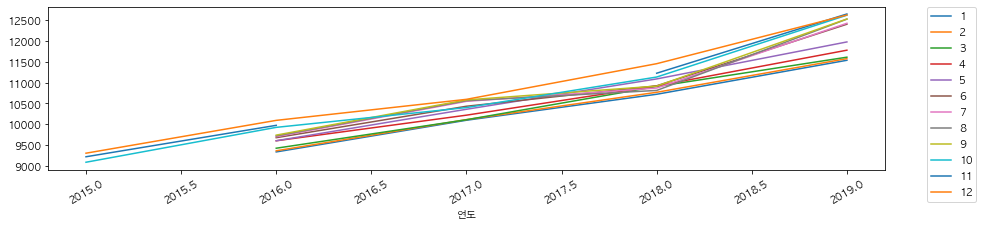

In [149]:
p = df_last.pivot_table(index='연도', columns='월', values='평당분양가격')
p.plot(figsize=(15,3), rot=30)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

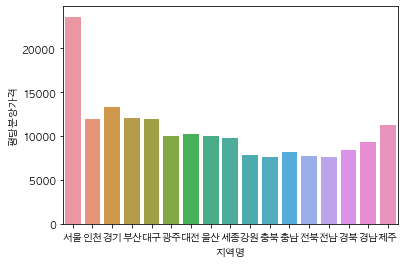

In [152]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격', ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

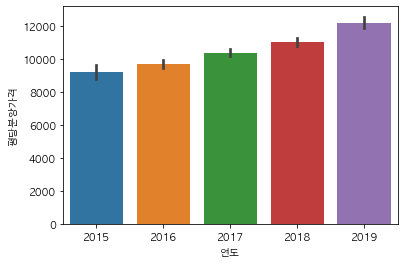

In [153]:
sns.barplot(data=df_last, x='연도', y='평당분양가격')

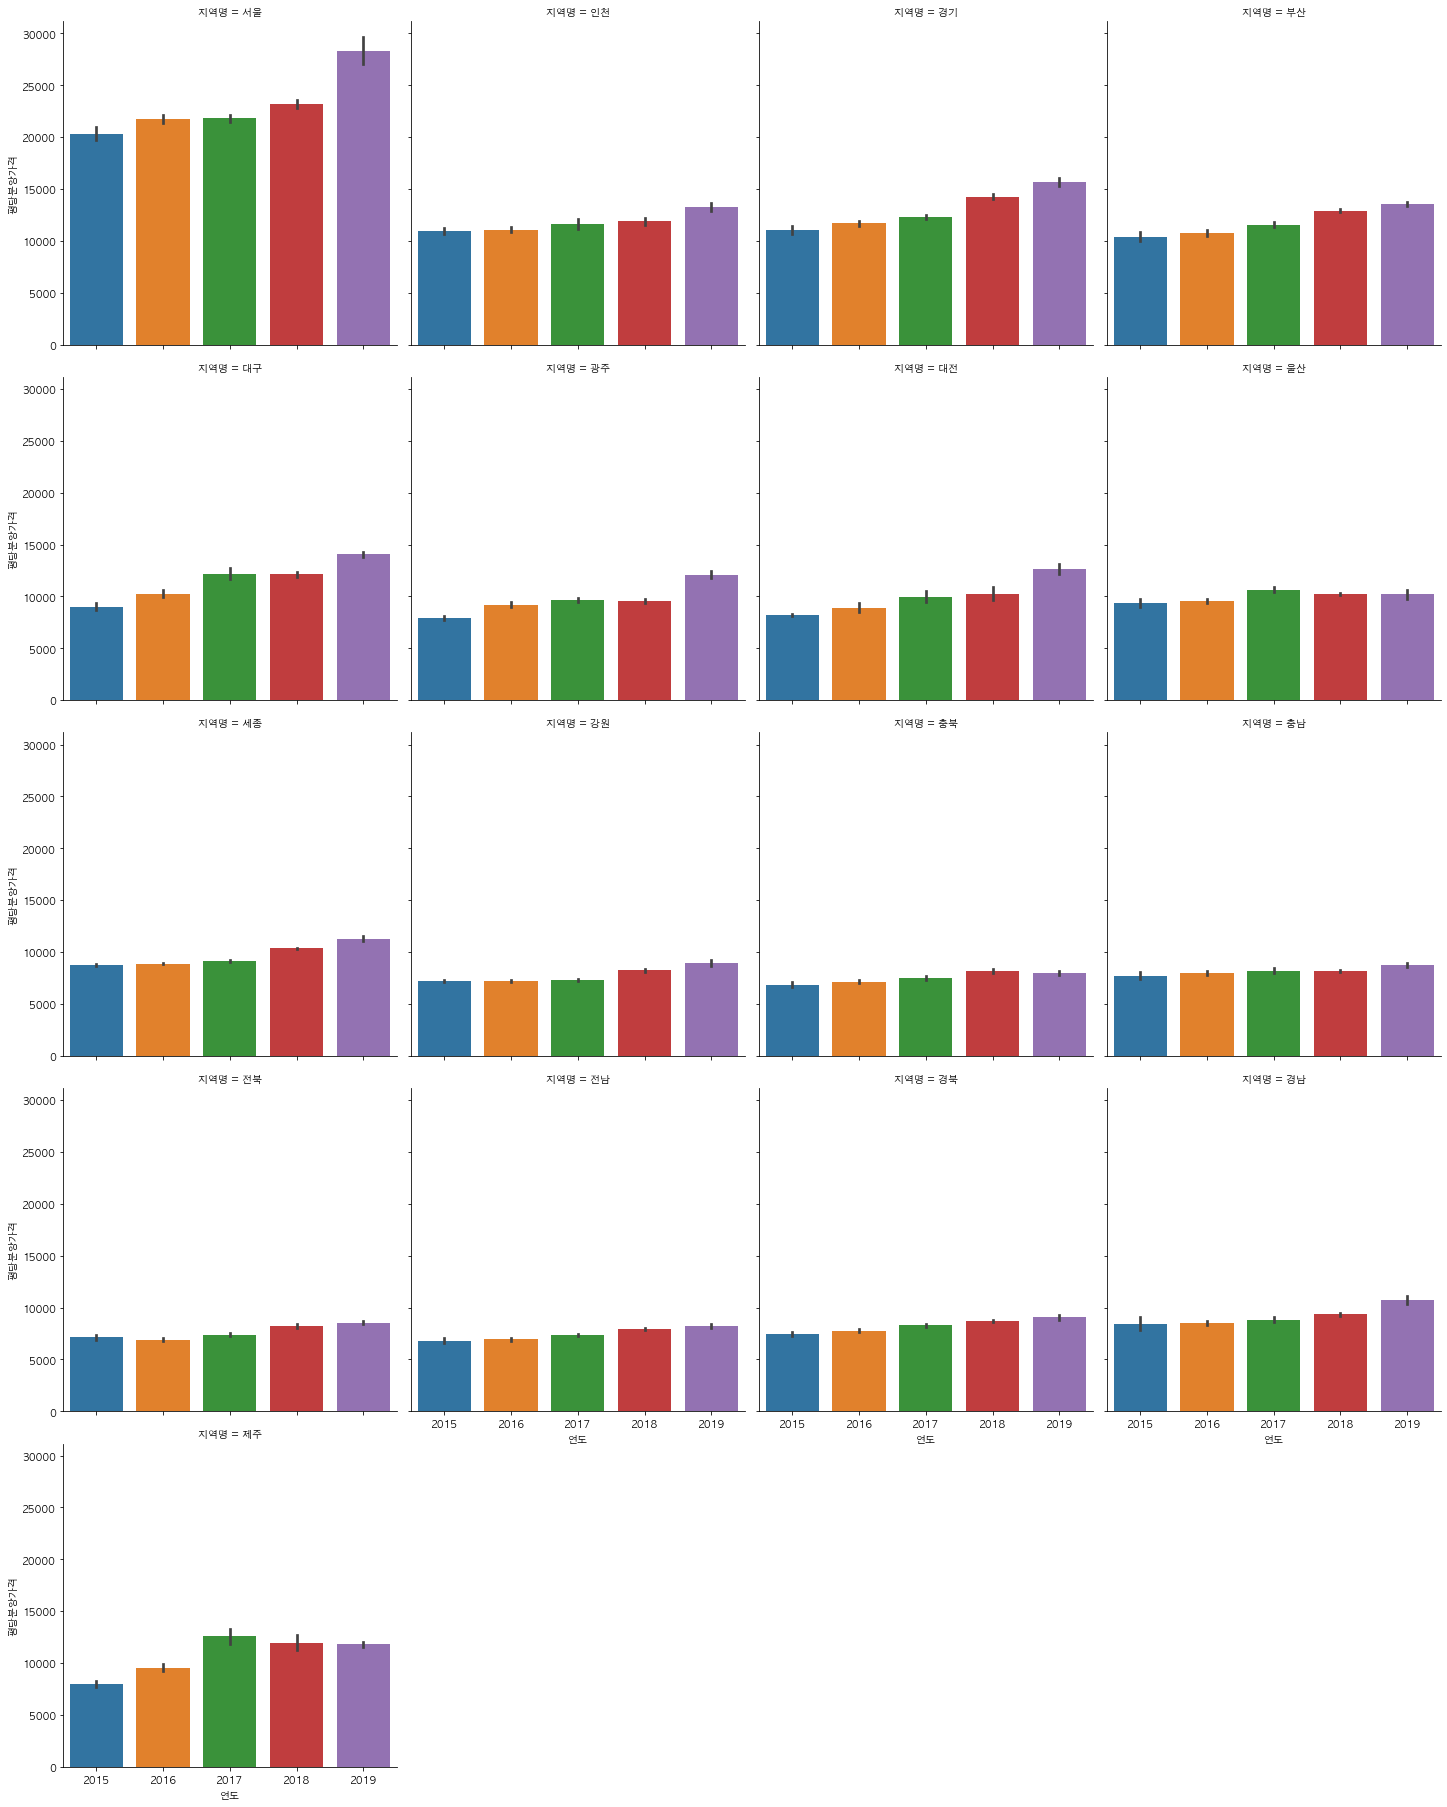

In [156]:
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

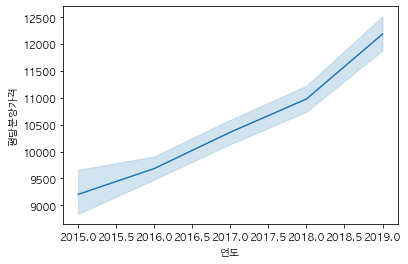

In [157]:
sns.lineplot(data=df_last, x='연도', y='평당분양가격')

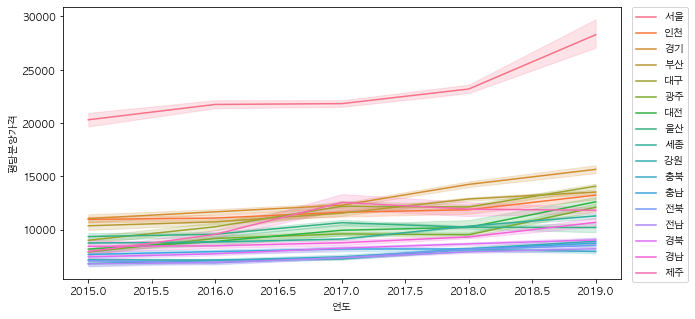

In [161]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x='연도', y='평당분양가격' ,hue='지역명')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

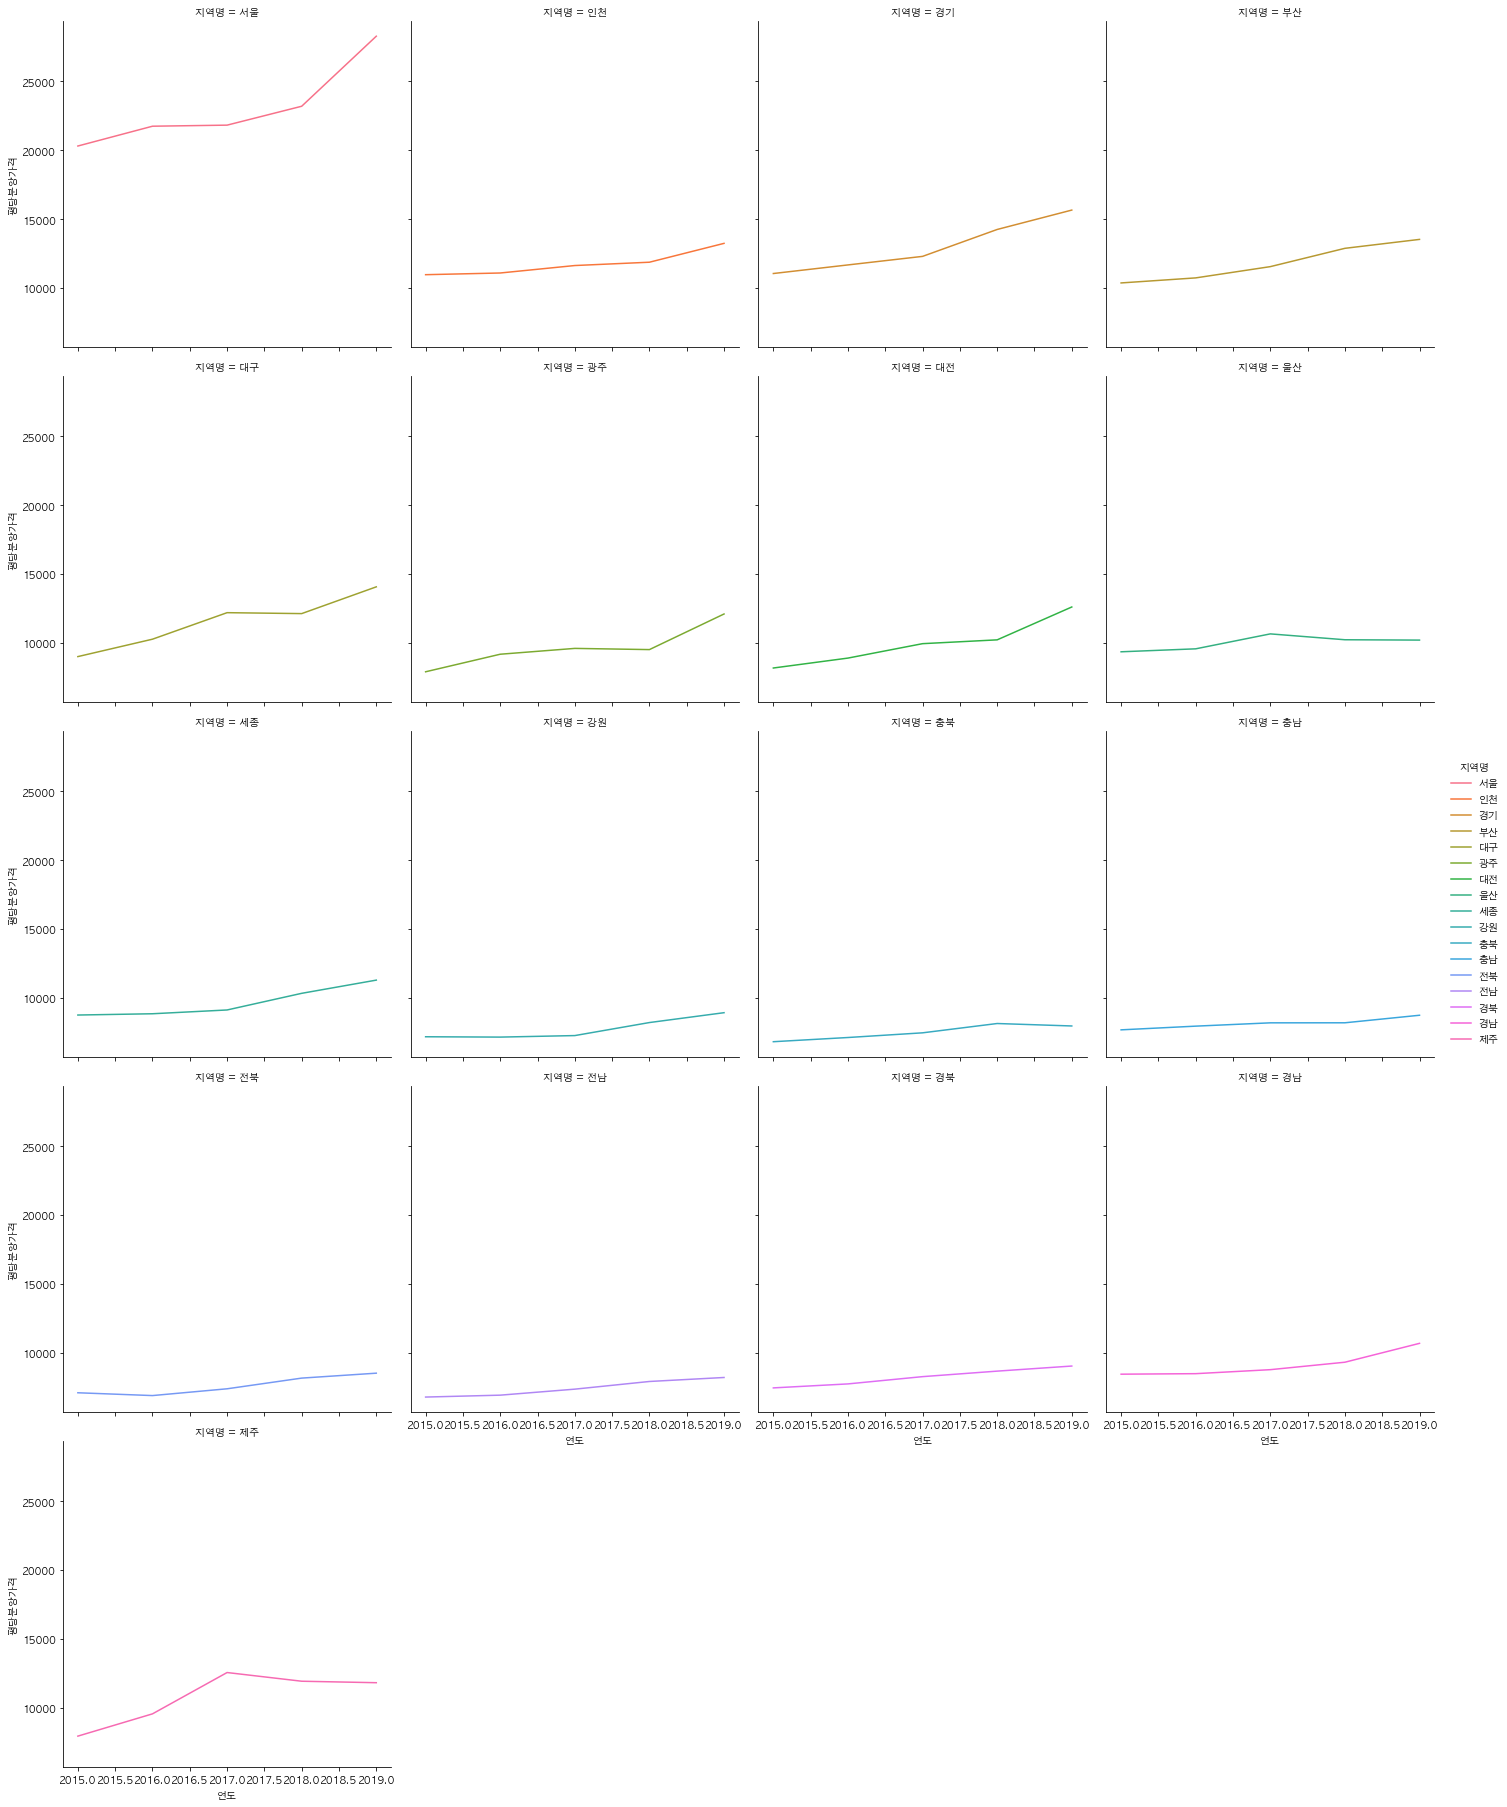

In [163]:
sns.relplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', kind='line', col='지역명', col_wrap=4, ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

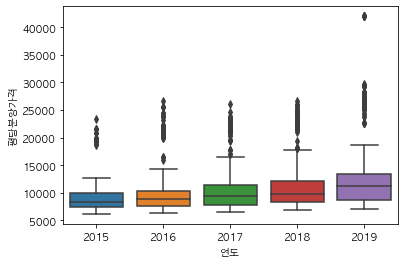

In [165]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

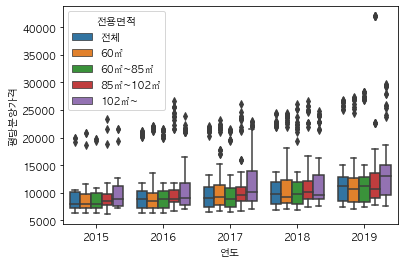

In [166]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

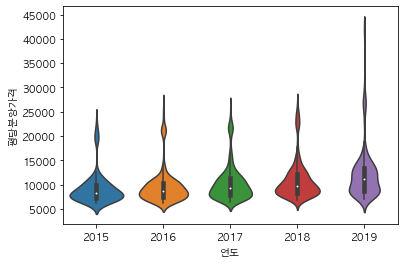

In [167]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

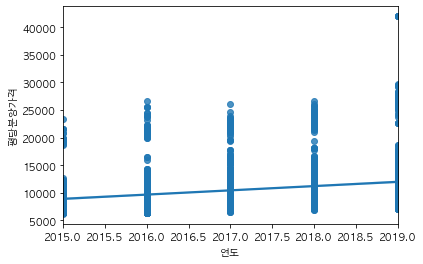

In [169]:
sns.regplot(data=df_last, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

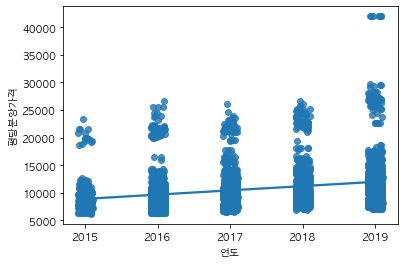

In [170]:
sns.regplot(data=df_last, x='연도', y='평당분양가격', x_jitter=.1)

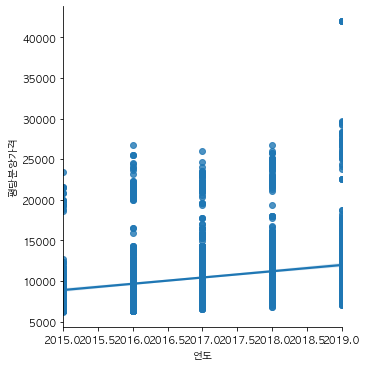

In [171]:
sns.lmplot(data=df_last, x='연도', y='평당분양가격')

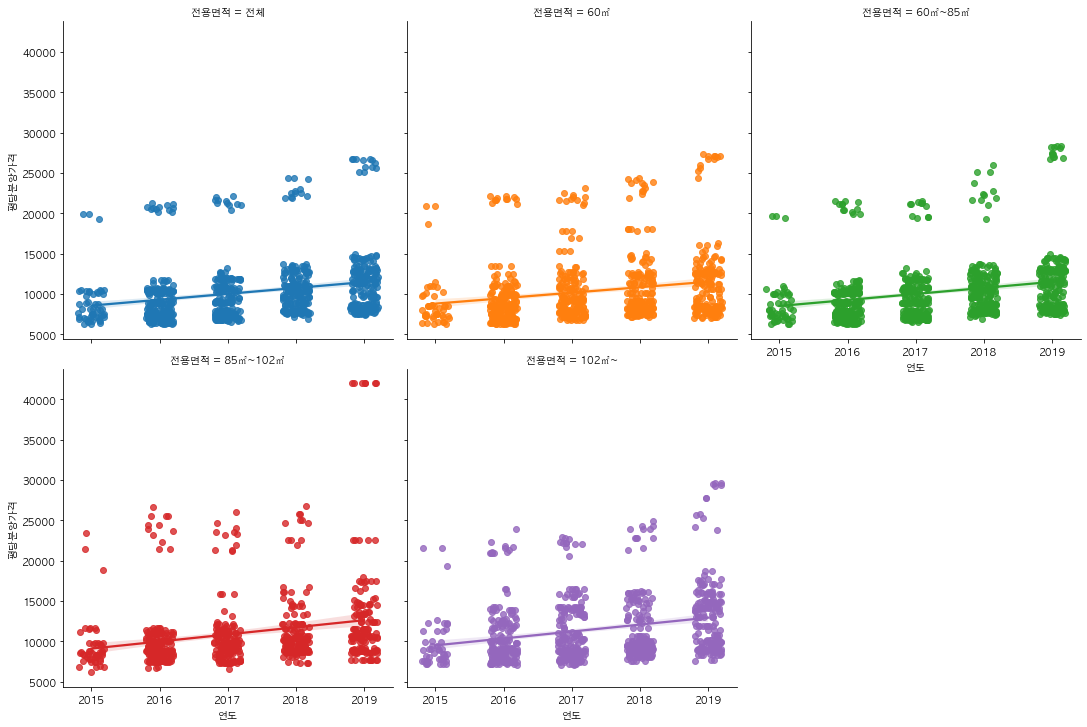

In [174]:
sns.lmplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적', col='전용면적', col_wrap=3, x_jitter=.2)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

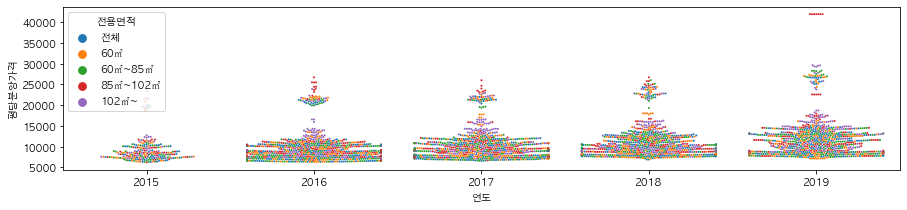

In [176]:
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last, x='연도', y='평당분양가격', hue='전용면적', size=2)

In [180]:
df_last[df_last['평당분양가격'] == df_last['평당분양가격'].max()]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


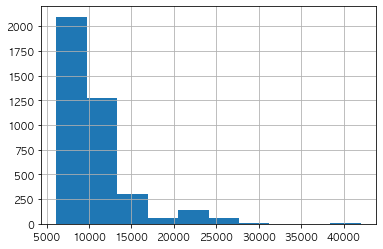

In [181]:
h = df_last['평당분양가격'].hist(bins=10)

In [193]:
price = df_last[df_last['평당분양가격'].notnull()].평당분양가격

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

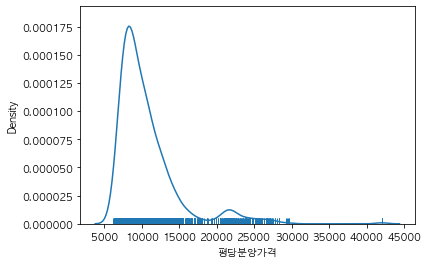

In [195]:
sns.distplot(price, hist=False, rug=True)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

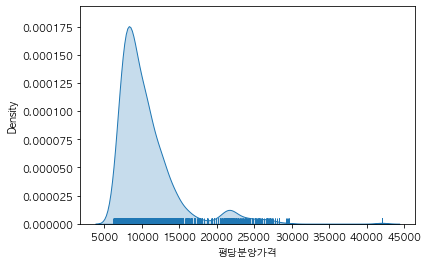

In [200]:
sns.kdeplot(price, shade=True)
sns.rugplot(price)

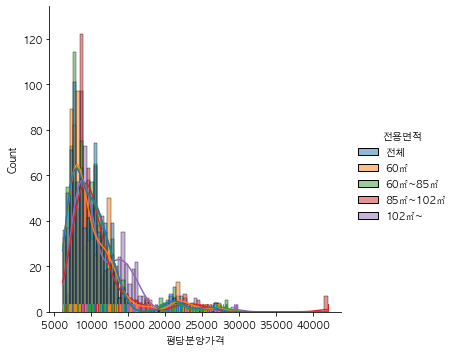

In [201]:
sns.displot(data=df_last, x='평당분양가격', kde=True, rug=True, hue='전용면적')

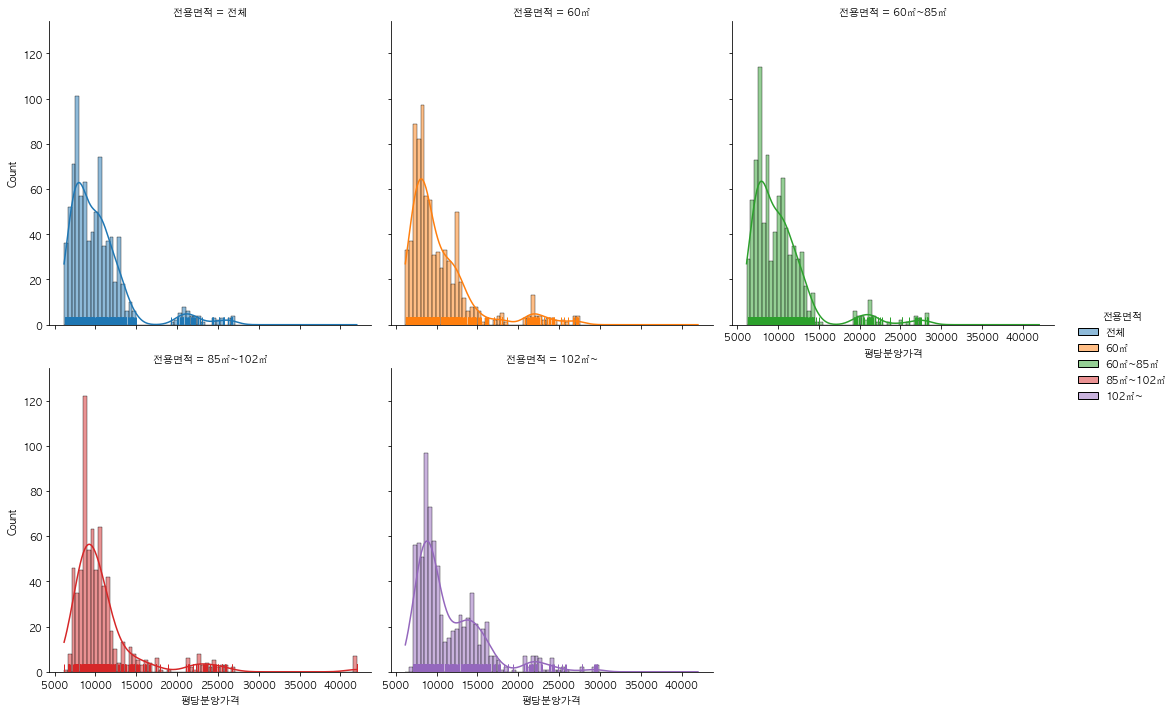

In [202]:
sns.displot(data=df_last, x='평당분양가격', kde=True, rug=True, hue='전용면적', col='전용면적', col_wrap=3)

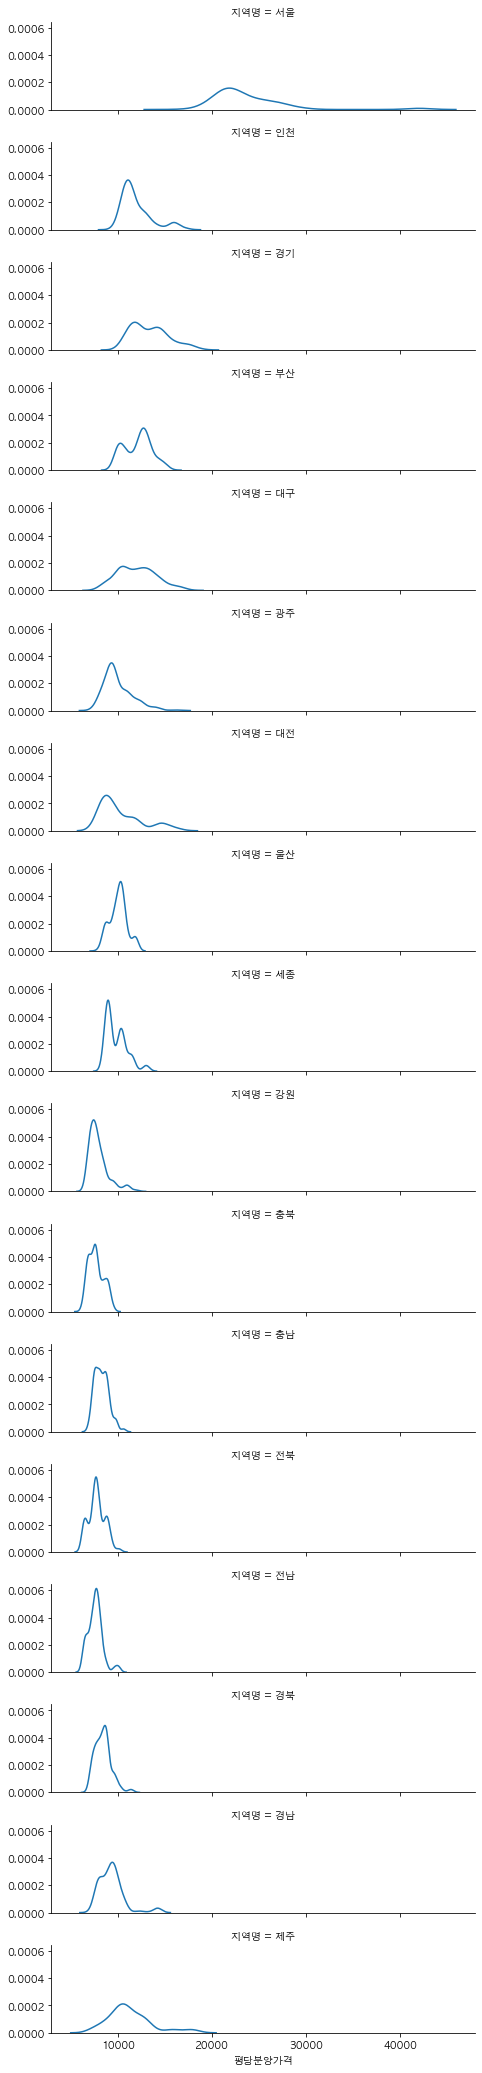

In [204]:
g = sns.FacetGrid(df_last, row='지역명', height=1.7, aspect=4)
g.map(sns.kdeplot, '평당분양가격')

In [206]:
df_last_notnull = df_last.loc[df_last['평당분양가격'].notnull(),['연도', '월', '평당분양가격', '전용면적']]
df_last_notnull

,연도,월,평당분양가격,전용면적
0,2015,10,19275.3,전체
1,2015,10,18651.6,60㎡
2,2015,10,19410.6,60㎡~85㎡
3,2015,10,18879.3,85㎡~102㎡
4,2015,10,19400.7,102㎡~
...,...,...,...,...
4327,2019,12,10114.5,60㎡~85㎡
4328,2019,12,10715.1,85㎡~102㎡
4330,2019,12,12810.6,전체
4332,2019,12,12863.4,60㎡~85㎡


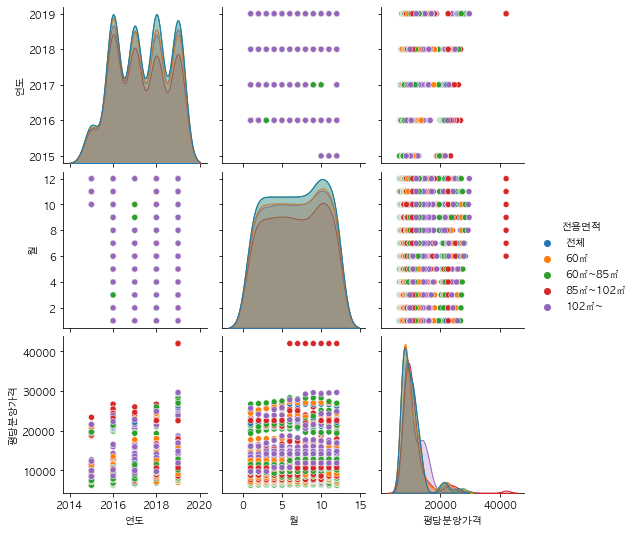

In [208]:
sns.pairplot(df_last_notnull, hue='전용면적')

In [209]:
df_last['전용면적'].value_counts()

102㎡~       867
85㎡~102㎡    867
60㎡~85㎡     867
전체          867
60㎡         867
Name: 전용면적, dtype: int64

In [210]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [215]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [216]:
df_first.melt(id_vars='지역', var_name='기간')

,지역,기간,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [220]:
def parse_year(date):
    year = date.split('년')[0]
    year = int(year)
    return year

y = parse_year('2017년10월')
y

2017

In [221]:
def parse_month(date):
    month = date.split('년')[1].replace('월','')
    return month

m = parse_month('2017년10월')
m

'10'

In [222]:
df_first_melt = df_first.melt(id_vars='지역', var_name='기간')

In [224]:
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)

In [226]:
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)

In [227]:
df_first_melt

,지역,기간,value,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [229]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [237]:
df_last_prepare = df_last.loc[df_last['전용면적']=='전체', cols].copy()
df_last_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [247]:
df_first_prepare = df_first_melt.rename({'지역': '지역명', 'value': '평당분양가격'}, axis=1)
df_first_prepare.drop(['기간'], axis=1, inplace=True)
df_first_prepare.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [259]:
df = pd.concat([df_first_prepare, df_last_prepare])
df = df[cols]
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [261]:
df['연도'].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

In [269]:
t = pd.pivot_table(df, index='연도', columns='지역명', values='평당분양가격').round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

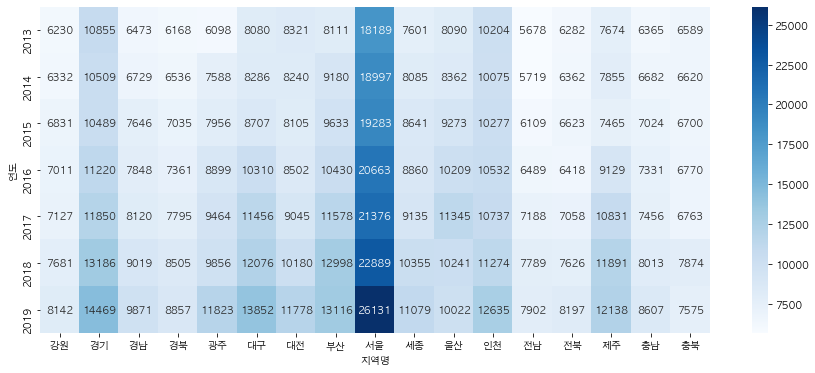

In [272]:
plt.figure(figsize=(15,6))
sns.heatmap(t, cmap='Blues', annot=True, fmt='.0f')

<AxesSubplot:xlabel='연도', ylabel='지역명'>

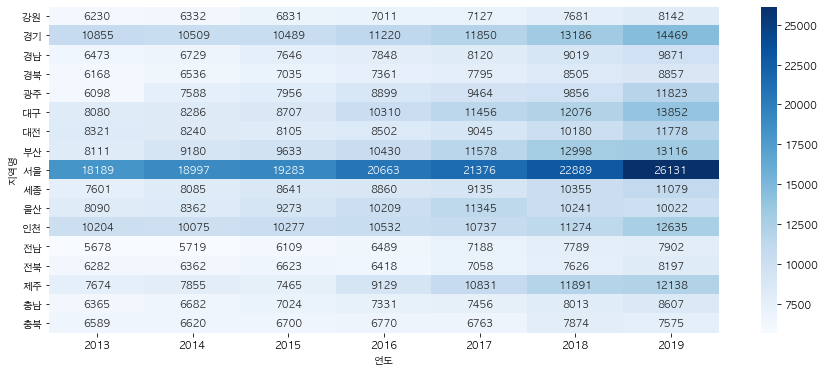

In [274]:
plt.figure(figsize=(15,6))
sns.heatmap(t.T, cmap='Blues', annot=True, fmt='.0f')

In [282]:
g = df.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().round()

<AxesSubplot:xlabel='지역명', ylabel='연도'>

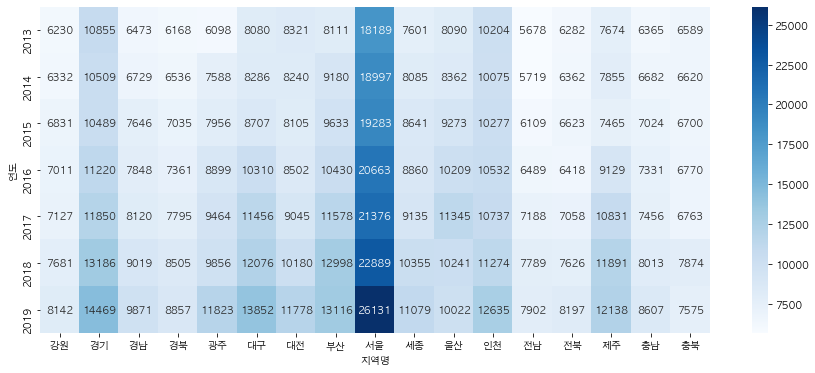

In [285]:
plt.figure(figsize=(15,6))
sns.heatmap(g, annot=True, fmt='.0f', cmap='Blues')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

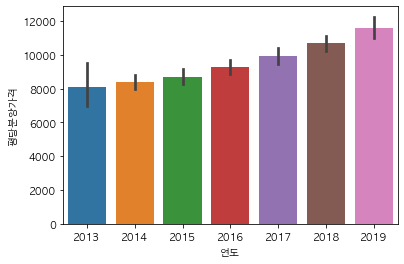

In [286]:
sns.barplot(data=df, x='연도', y='평당분양가격')

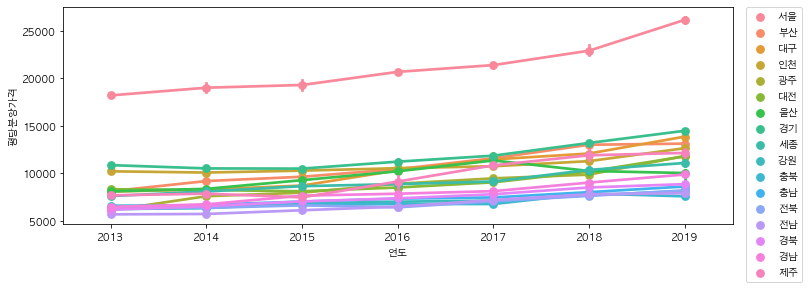

In [288]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0)

In [290]:
df_busan = df[df['지역명']=='부산'].copy()
df_busan

,지역명,연도,월,평당분양가격
1,부산,2013,12,8111.0
18,부산,2014,1,8111.0
35,부산,2014,2,9078.0
52,부산,2014,3,8965.0
69,부산,2014,4,9402.0
...,...,...,...,...
3925,부산,2019,8,12972.3
4010,부산,2019,9,13275.9
4095,부산,2019,10,13332.0
4180,부산,2019,11,13150.5


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

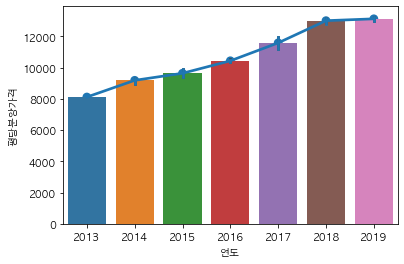

In [292]:
sns.barplot(data=df_busan, x='연도', y='평당분양가격')
sns.pointplot(data=df_busan, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

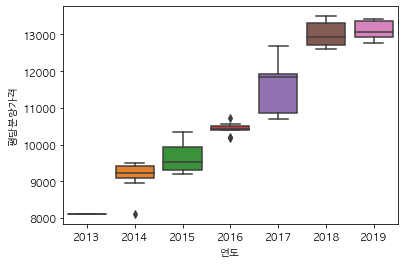

In [296]:
sns.boxplot(data=df_busan, x='연도', y='평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

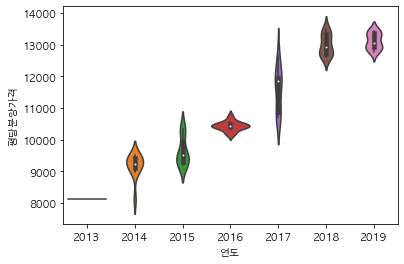

In [297]:
sns.violinplot(data=df_busan, x='연도', y='평당분양가격')

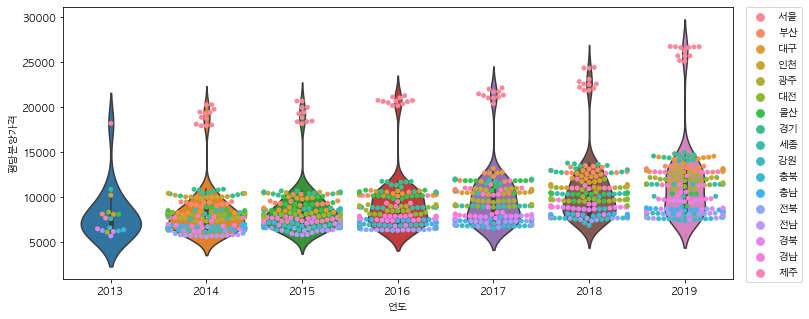

In [300]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x='연도', y='평당분양가격')
sns.swarmplot(data=df, x='연도', y='평당분양가격', hue='지역명')
plt.legend(bbox_to_anchor =(1.02,1), loc=2, borderaxespad=0.)